In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

datapath = './data/'
filenames = ["50_SupermarketBranches.csv", "Ads_CTR_Optimisation.csv", 
             "Market_Basket_Optimisation.csv", "Supermarket_CustomerMembers.csv"]
filepaths = [datapath + file for file in filenames]
filepaths

['./data/50_SupermarketBranches.csv',
 './data/Ads_CTR_Optimisation.csv',
 './data/Market_Basket_Optimisation.csv',
 './data/Supermarket_CustomerMembers.csv']

In [2]:
# 50SupermarketBranches.csv 
# contains the information of 50 supermarket branches such as their spending 
# on the advertisement, administration and promotion, states and profits.

df_branches = pd.read_csv(filepaths[0])
df_branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Advertisement Spend   50 non-null     float64
 1   Promotion Spend       50 non-null     float64
 2   Administration Spend  50 non-null     float64
 3   State                 50 non-null     object 
 4   Profit                50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df_branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print(df_branches.State.unique())
df_branches.describe(include=object)

['New York' 'California' 'Florida']


,State
count,50
unique,3
top,New York
freq,17


Имеем датасет, описывающий 50 супермаркетов пятью параметрами. `State` - категориальный, остальные - вещественные.

Объекты расположены в следующих локациях: `New York`, `California`, `Florida`. Чаще других встречается локация `New York` - 34% записей.

In [5]:
df_branches.describe()

,Advertisement Spend,Promotion Spend,Administration Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


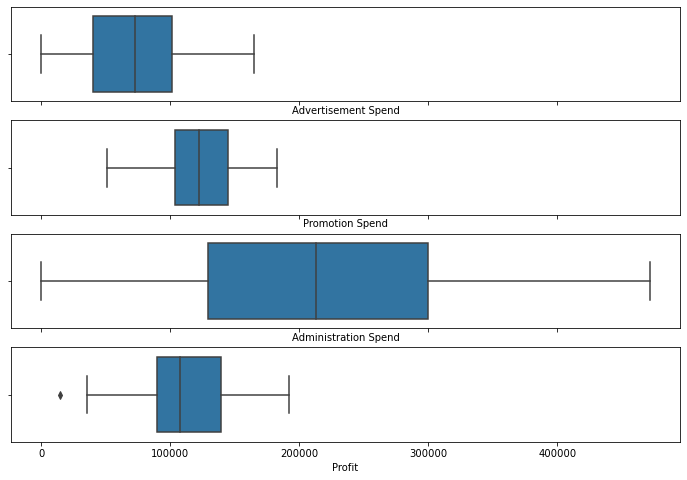

In [6]:
fig, axs = plt.subplots(figsize=(12, 8), nrows=4, sharex=True)
for row, stat in zip(
    axs.flatten(), ["Advertisement Spend", "Promotion Spend", "Administration Spend", "Profit"]):
    sns.boxplot(x=df_branches[stat], ax=row);

Бросаются в глаза следующие моменты:
- существует супермаркет, где затраты `Advertisement Spend` оцениваются как `0`;
- существует супермаркет, где затраты `Administration Spend` оцениваются как `0`;
- размах значений `Administration Spend`
- выброс по признаку `Profit`

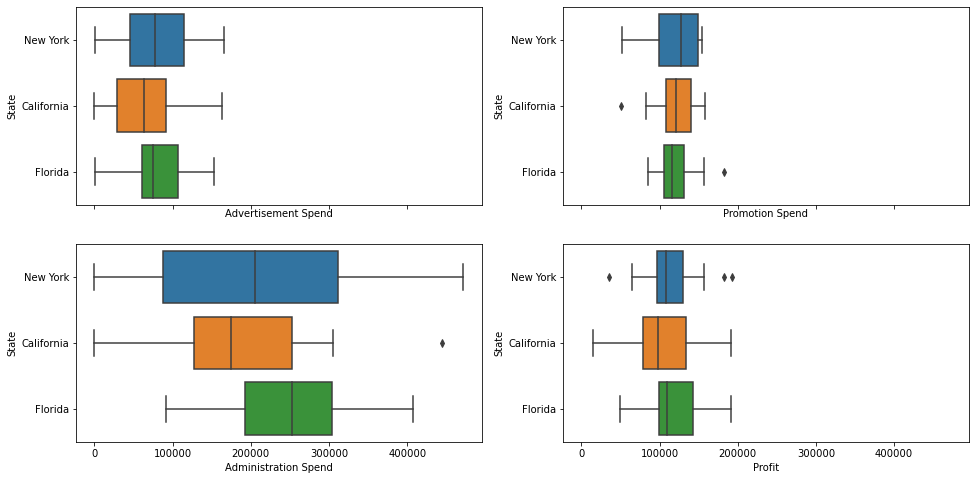

In [7]:
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=2, sharex=True)
for ax, feature in zip(
    axs.flatten(), ["Advertisement Spend", "Promotion Spend", "Administration Spend", "Profit"]):
    sns.boxplot(data=df_branches, x=feature, y='State', ax=ax);

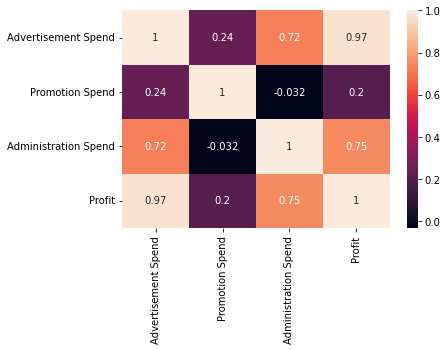

In [8]:
# затраты на рекламу очень сильно кореллируют с прибылью
# высокая корелляция попарно между Advertisements Spend, Administration Spend, Profit
sns.heatmap(df_branches.corr(), annot=True);

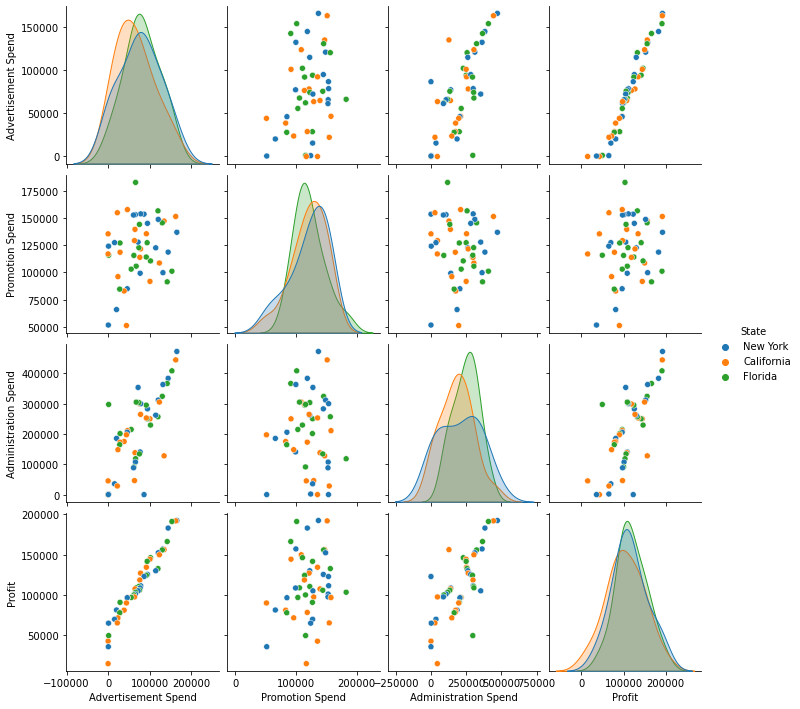

In [9]:
sns.pairplot(df_branches, hue='State')

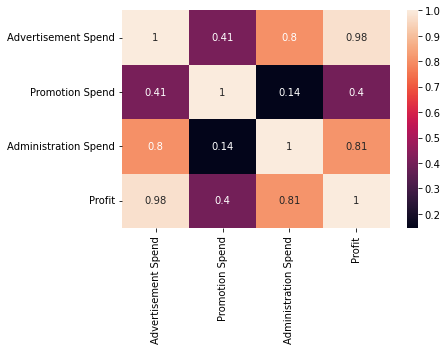

In [10]:
sns.heatmap(df_branches.query('State == "New York"').corr(), annot=True);

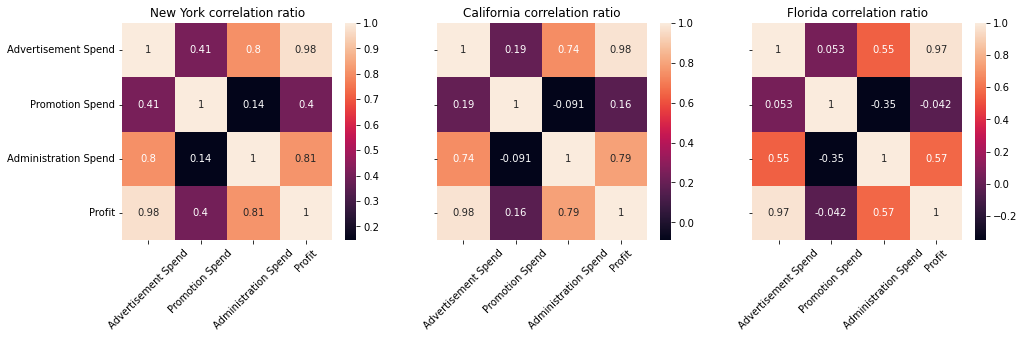

In [11]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=3, sharey=True)
for state, ax in zip(df_branches.State.unique(), axs.flatten()):
    ax.set_title("{} correlation ratio".format(state))    
    _ = sns.heatmap(df_branches.query('State == "{}"'.format(state)).corr(), annot=True, ax=ax)
    ax.tick_params('x', labelrotation=45)

In [62]:
df_ads = pd.read_csv(filepaths[1])
df_customers = pd.read_csv(filepaths[3])

In [63]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# MarketBasketOptimisation.csv This dataset contains 7500 sales transactions in a week.

with open(filepaths[2]) as file:
    baskets = file.readlines()
baskets[1:4]

['burgers,meatballs,eggs\n', 'chutney\n', 'turkey,avocado\n']

In [15]:
baskets = list(map(lambda line: line.strip().split(','), baskets)) # делим по запятой на отдельные категории
baskets[1:4]

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado']]

In [16]:
import itertools
from collections import Counter

# сцепим все элементы в один список 
basket_items = list(itertools.chain.from_iterable(baskets))

basket_items_counter = Counter(basket_items)
basket_items_unique = basket_items_counter.keys()

In [17]:
# заготовка для создания датасета, где по столбцам - все возможные товары, по строкам - флаг присутствия в заказе
basket_items_df = []
for basket in baskets:
    basket_items_df.append(tuple(map(lambda item: item in basket, basket_items_unique)))

In [18]:
# результат
df_basket = pd.DataFrame(
    basket_items_df, 
    columns=basket_items_unique)

In [41]:
df_basket.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# сравним с оригинальным набором
n = 7
df_basket.iloc[n][df_basket.iloc[n]]

soup           True
light cream    True
shallot        True
Name: 7, dtype: bool

In [20]:
baskets[n]

['soup', 'light cream', 'shallot']

In [21]:
# преобразуем в целые числа
# df_basket.apply(lambda row: row.apply(int))

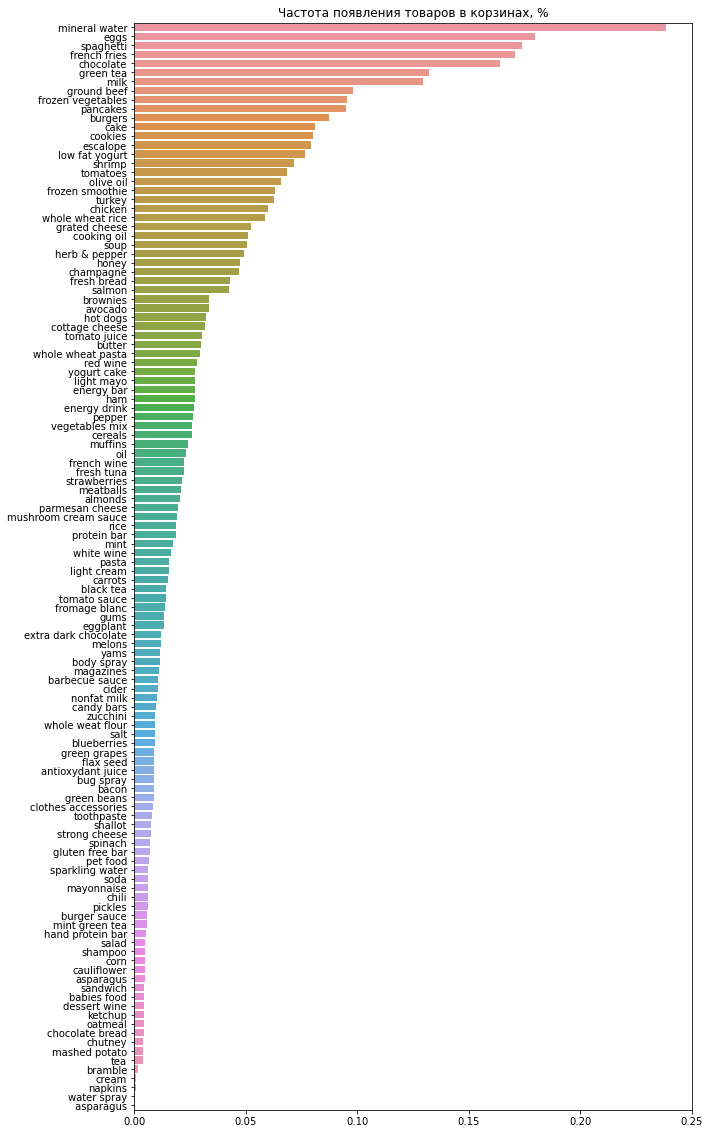

In [22]:
# посмотрим на самые популярные товары в корзинах
# * наивно предполагая, что названия товаров в корзине не могут повторяться

# нормируем на число корзин - получим долю корзин, в которых товар появлялся
basket_items_proba = dict()
for item in basket_items_unique:
    basket_items_proba[item] = basket_items_counter[item] / df_basket.shape[0] 

# отсортируем пары значений (товар, доля корзин)
basket_items_proba = sorted(basket_items_proba.items(), key=lambda x: x[1], reverse=True)

data = list(map(list, zip(*basket_items_proba))) # по сути, транспонирование для создания столбцов данных

plt.figure(figsize=(10, 20))
plt.title("Частота появления товаров в корзинах, %")
sns.barplot(y=data[0], x=data[1]);

# присутствуют товары, которые названы по-разному, например, 
# energy bar, protein bar, hand protein bar;
# sparkling water, soda;
# tea, green tea, black tea - как минимум, одна категория

In [47]:
# альтернативный способ создать датафрейм (длинный вид)


pre_bask = []
for b_id, basket in enumerate(baskets):
    for item in basket:
        pre_bask.append((b_id, item, True))

df_basket2 = pd.DataFrame(pre_bask, columns=["basket_id", "item", 'value'])

# а дубликаты то существуют!
df_basket2[df_basket2.duplicated()]

,basket_id,item,value
17618,4394,ham,True
17952,4494,ham,True
18039,4526,ham,True
27165,6903,chocolate,True
27873,7109,ham,True


In [57]:
df_basket2 \
    .drop_duplicates() \
    .pivot(index='basket_id', columns='item', values='value') \
    .fillna(False)


item,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
basket_id,,,,,,,,,,,,,,,,,,,,,
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df_customers.drop('CustomerID', axis=1, inplace=True)
df_customers

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [66]:
df_customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [68]:
df_customers.value_counts('Genre', normalize=True)

Genre
Female    0.56
Male      0.44
dtype: float64

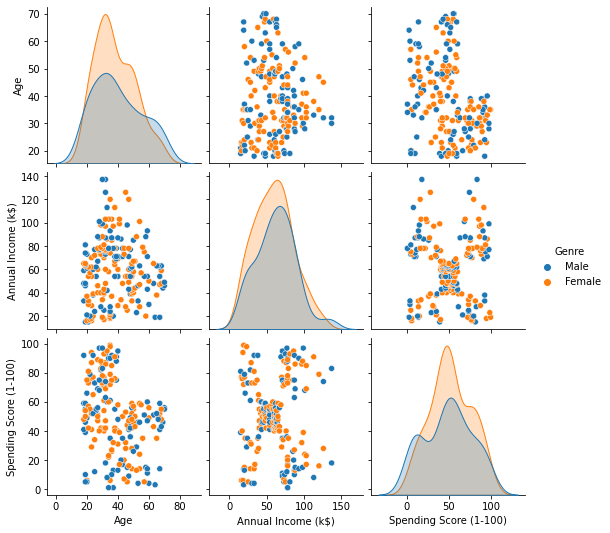

In [65]:
sns.pairplot(df_customers, hue='Genre')

In [69]:
df_customers_cp = df_customers.copy()


In [73]:
df_customers['AgeGroup'] = pd.cut(df_customers.Age, bins=[0]+[23+i*7 for i in range(10)], labels=list(range(10)))
df_customers

,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,4
197,Male,32,126,74,2
198,Male,32,137,18,2
